In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
data = pd.read_csv('spam.csv',encoding='Windows-1252')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
data = data.iloc[:,0:2]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
data = data.rename(columns={'v1':'labels','v2':'message'})
data.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
data.isnull().sum()

labels     0
message    0
dtype: int64

In [26]:
data.dtypes

labels     object
message    object
dtype: object

<Axes: >

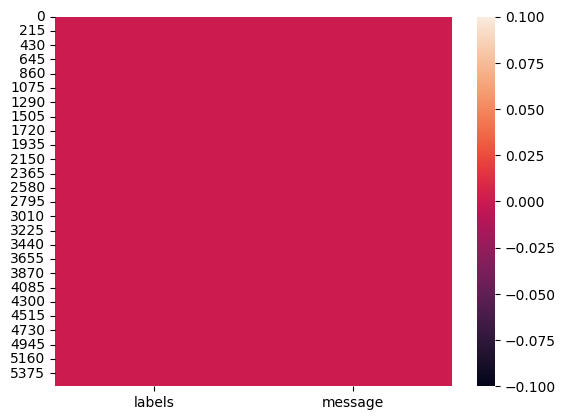

In [27]:
sns.heatmap(data.isnull(),cbar='plasma')

In [28]:
data.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [29]:
data.groupby('labels').count()

,message
labels,
ham,4825
spam,747


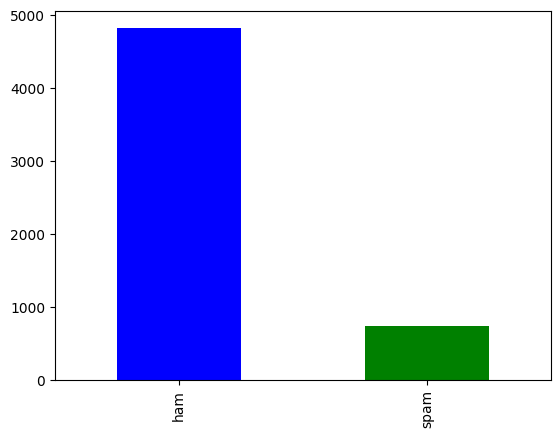

In [30]:
dat = pd.value_counts(data['labels'],sort=True)
dat.plot(kind='bar',color=['blue','green'])
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['labels'] = le.fit_transform(data['labels'])
data.head()

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
count1 = Counter(" ".join(data[data['labels']==0]['message']).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0:"words in non-spam",1:"count"})
count2 = Counter(" ".join(data[data['labels']==1]['message']).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0:"words in spam",1:"count"})

In [33]:
df1

,words in non-spam,count
0,to,1530
1,you,1458
2,I,1436
3,the,1019
4,a,969
5,and,738
6,i,736
7,in,734
8,u,645
9,is,638


In [34]:
df2

,words in spam,count
0,to,604
1,a,358
2,your,187
3,call,185
4,or,185
5,the,178
6,2,169
7,for,169
8,you,164
9,is,143


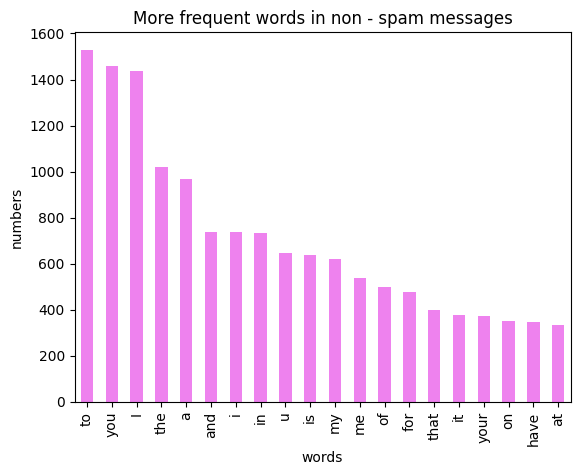

In [35]:
df1.plot.bar(legend=False,color='violet')
y_pos = np.arange(len(df1['words in non-spam']))
plt.xticks(y_pos,df1['words in non-spam'])
plt.title('More frequent words in non - spam messages')
plt.xlabel('words')
plt.ylabel('numbers')
plt.show()

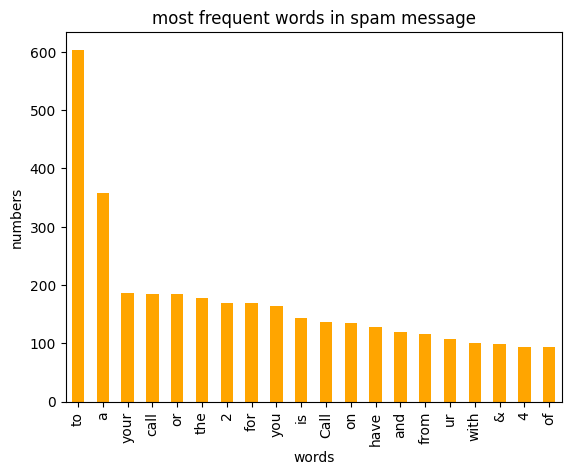

In [36]:
df2.plot.bar(legend=False,color='orange')
y_pos = np.arange(len(df2['words in spam']))
plt.title('most frequent words in spam message')
plt.xticks(y_pos,df2['words in spam'])
plt.ylabel('numbers')
plt.xlabel('words')
plt.show()

In [37]:
# count vector will remove all the text
count_vector = CountVectorizer(stop_words='english')
x = count_vector.fit_transform(data['message'])
np.shape(x)

(5572, 8405)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train,x_test,y_train,y_test = train_test_split(x,data['labels'],test_size=0.2,random_state=10)

In [39]:
svm_model = SVC(kernel='linear',C=1)
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)

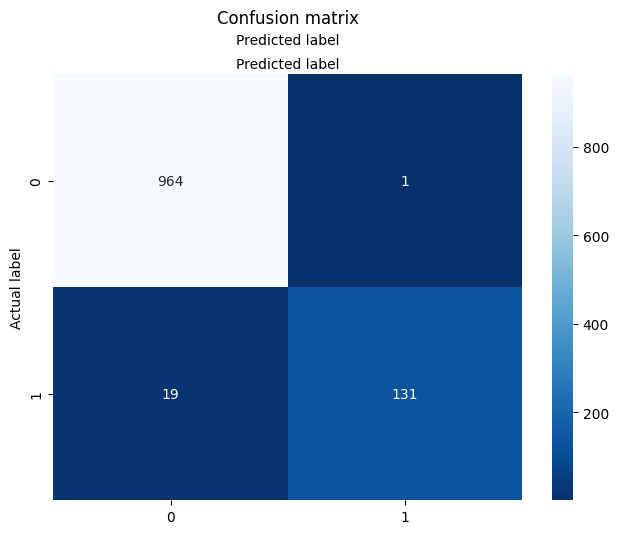

In [45]:

import seaborn as sns
import pandas as pd
from sklearn.metrics import *
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted labels
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['ham', 'spam']

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Corrected line for adding text
plt.text(0.5, 1.08, 'Predicted label', ha='center', va='center', transform=ax.transAxes)

plt.show()


In [46]:
print(classification_report(y_test,y_pred,target_names=class_names))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [44]:
svc = SVC(kernel='linear',C=1)
from sklearn.model_selection import cross_val_score
for folds in range(5,15):
    scores = cross_val_score(svm_model,x,data['labels'],cv=folds)
    print(f'Cross validation score for {folds} folds: {scores.mean():.4f}')

Cross validation score for 5 folds: 0.9822
Cross validation score for 6 folds: 0.9826
Cross validation score for 7 folds: 0.9831
Cross validation score for 8 folds: 0.9826
Cross validation score for 9 folds: 0.9833
Cross validation score for 10 folds: 0.9835
Cross validation score for 11 folds: 0.9833
Cross validation score for 12 folds: 0.9829
Cross validation score for 13 folds: 0.9842
Cross validation score for 14 folds: 0.9840


NON LINEAR

In [49]:
nonlinear_svm_classifier = SVC(kernel='rbf')
nonlinear_svm_classifier.fit(x_train, y_train)

SVC()

In [50]:
y_pred_nonlinear = nonlinear_svm_classifier.predict(x_test)

In [51]:
accuracy_nonlinear = accuracy_score(y_test, y_pred_nonlinear)
print(f"Non-Linear SVM Accuracy: ",accuracy_nonlinear*100,"%")

Non-Linear SVM Accuracy:  97.13004484304932 %
